In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X_original = pd.read_csv('./vehicles.csv')

In [71]:
invalid_indexes = X_original[(X_original['price'] <= 0.0) | (X_original['price'] >= 50000.0)].index
X = X_original.drop(invalid_indexes)
y = X_original.price
y = y.drop(invalid_indexes)

(array([ 6585.,  4018.,  5752.,  3208.,  6390.,  7981.,  4842.,  8812.,
        12142.,  5278., 11107., 12585., 10597.,  4154., 14404.,  7945.,
         6125., 11758.,  7917.,  5281., 11637.,  6720.,  5599., 10144.,
         5539., 13581.,  1106.,  4788., 13389.,  1006.,  4003., 10475.,
         1114.,  3942.,  9814.,  3995.,  1845.,  9821.,  3860.,  2115.,
         9486.,  3461.,  3719.,  8668.,  3217.,  3635.,  6815.,  3228.,
         8652.,   830.,  3037.,  7906.,   912.,  2650.,  6862.,   890.,
         2452.,  8200.,   679.,  1628.,  3838.,  1738.,  1002.,  4841.,
         1748.,  1754.,  3671.,  1601.,  1726.,  3421.,  1399.,  5103.,
         1085.,  1208.,  4184.,   372.,  1394.,  3957.,   447.,  1262.,
         3428.,   465.,  1257.,  2983.,  1133.,   732.,  4282.,   446.,
          569.,  1532.,   640.,   860.,  1832.,   769.,   796.,  1417.,
          492.,  1902.,   168.,   576.,  2504.,   120.,   312.,  1545.,
          169.,   468.,  1586.,   201.,   349.,  1463.,   297., 

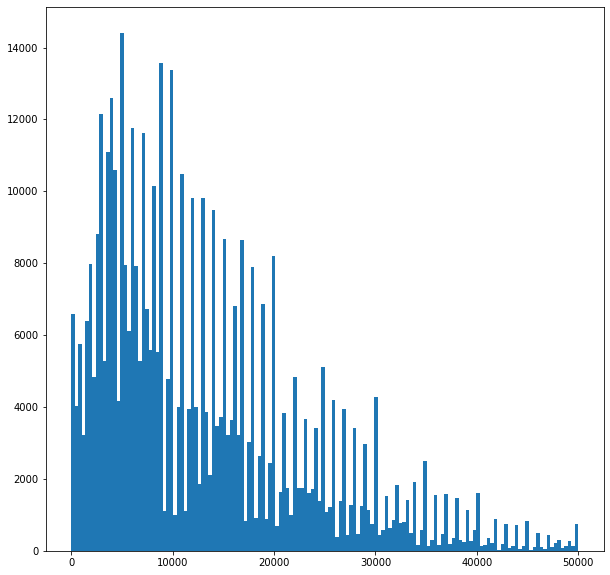

In [72]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(y, bins='auto')

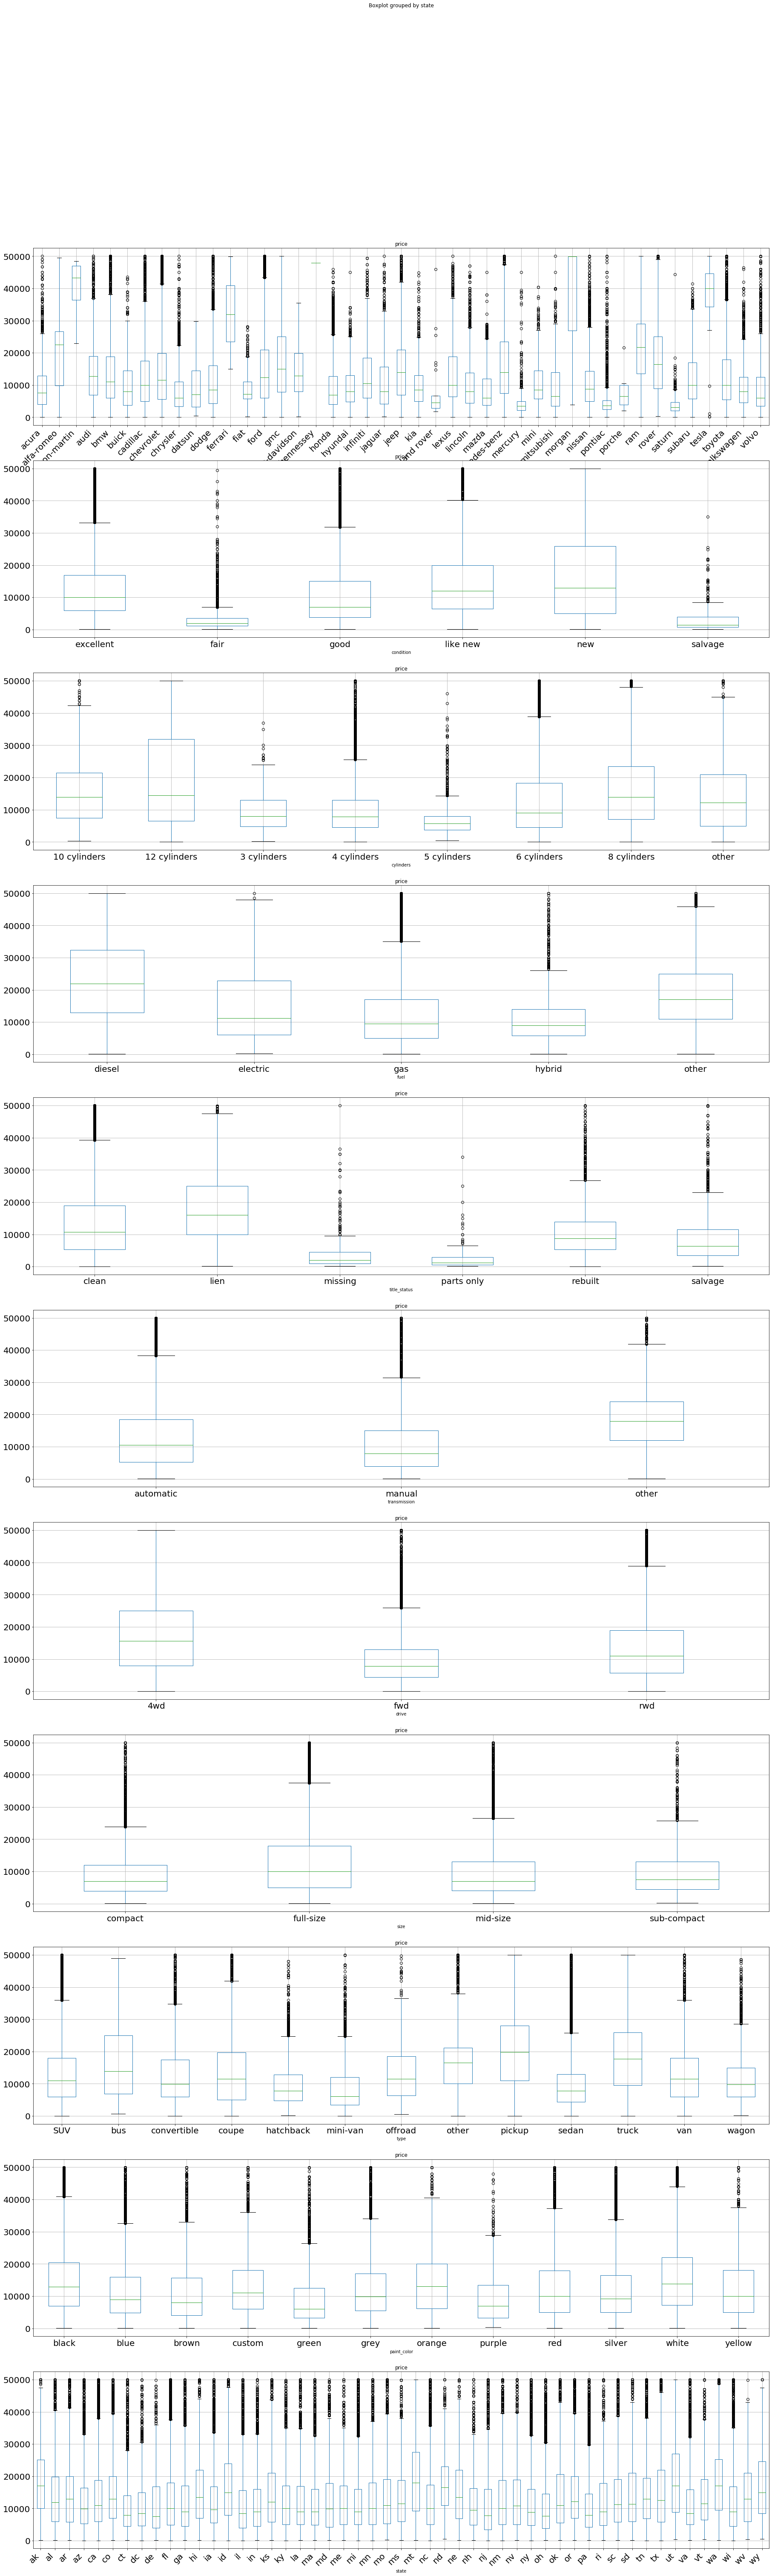

In [58]:
categorical_cols = list(X.dtypes[X.dtypes == 'object'].to_dict().keys())
small_valued_columns = []

for column in categorical_cols:
    values = len(X[column].unique())
    if values < 52:
        small_valued_columns.append(column)

fig, ax = plt.subplots(len(small_valued_columns), figsize=(30,100))

for i, column in enumerate(small_valued_columns):
    X.boxplot(by=column, column=['price'], ax=ax[i], fontsize=20)
    if len(ax[i].get_xticklabels()) > 40:
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

483308.0


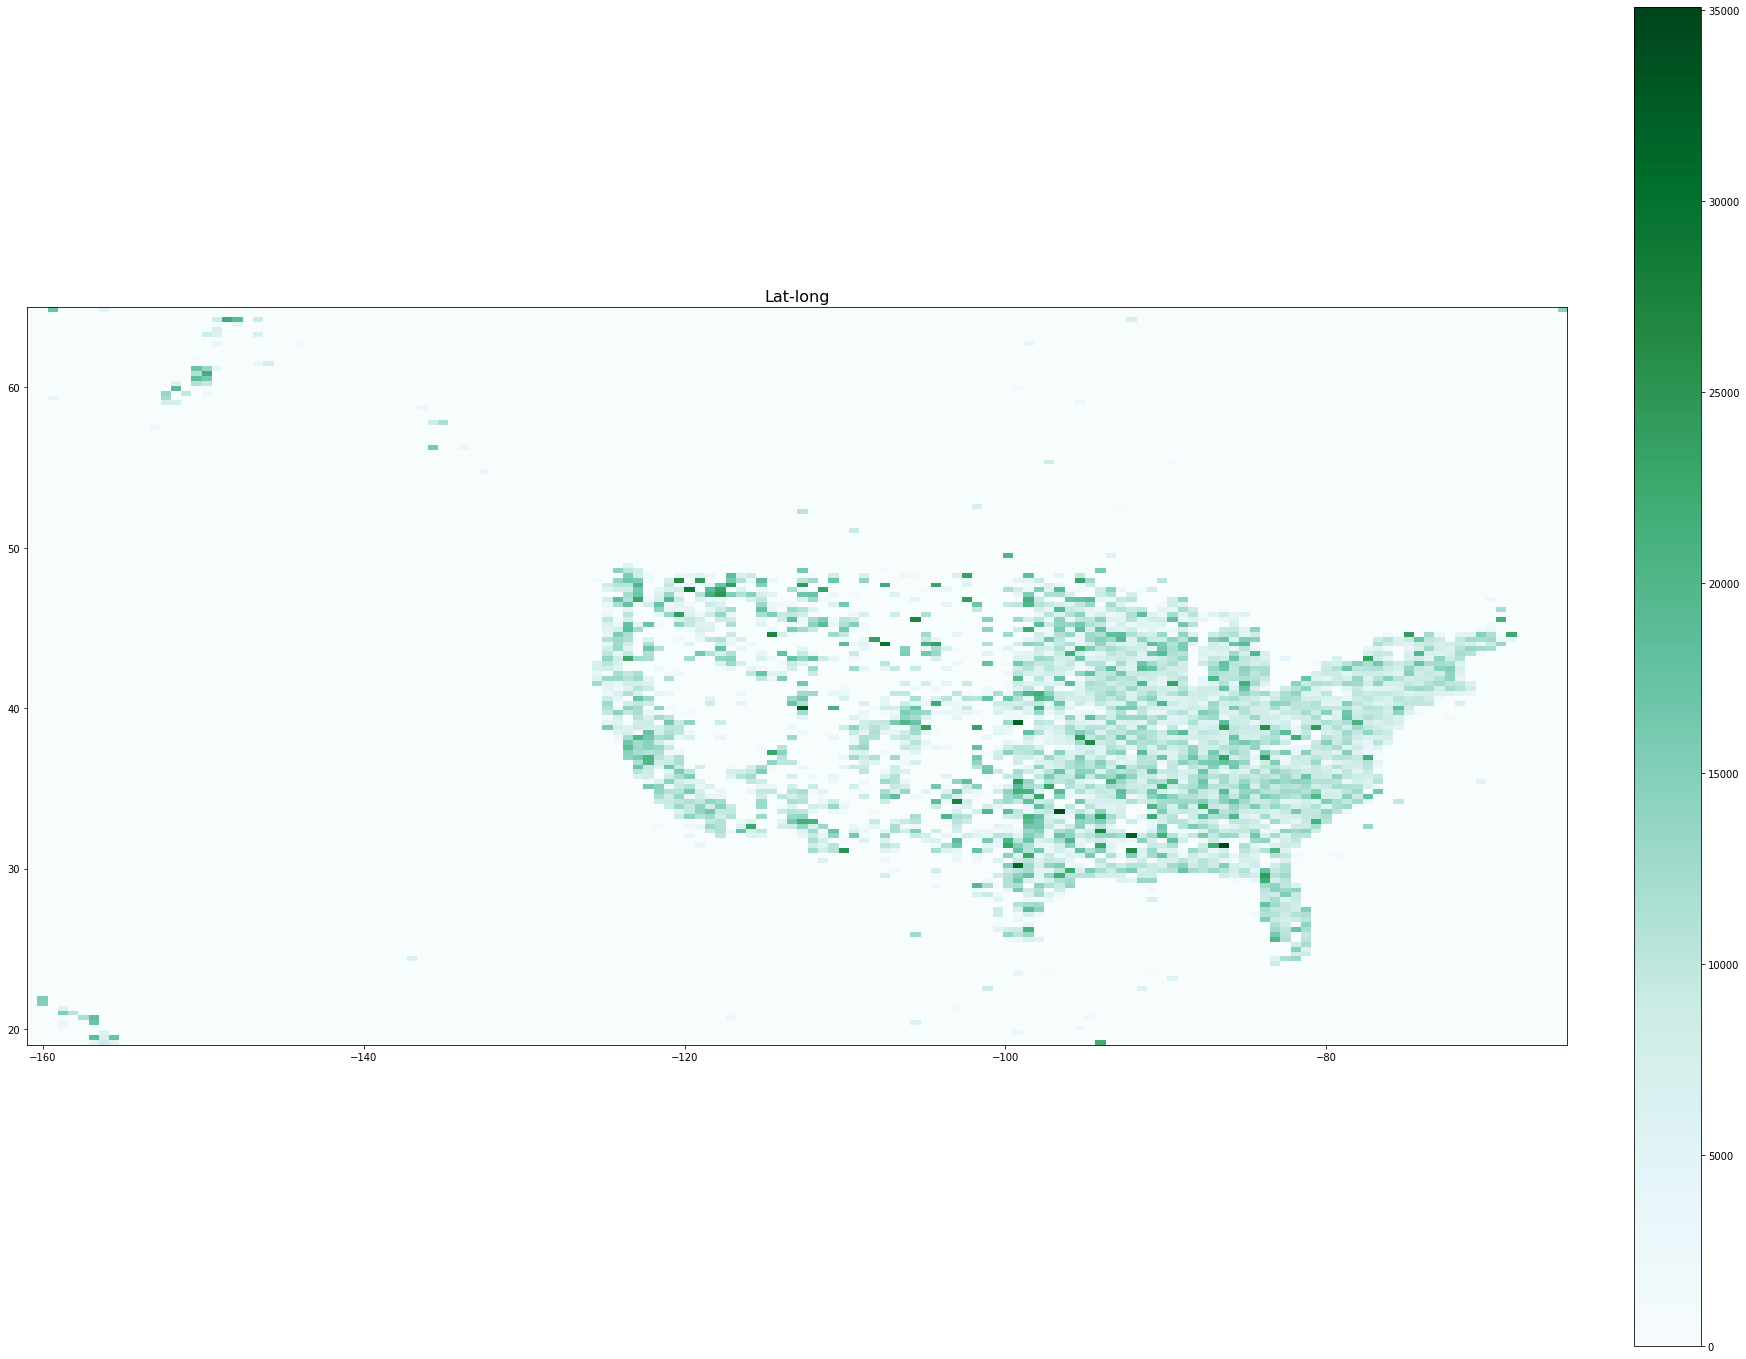

In [134]:
# Compute percentage bins
bin_amount = 150
lat_dims = [19, 65]
lng_dims = [-161, -65]
longitude = X.long.to_numpy()
latitude = X.lat.to_numpy()
numpy_y = y.to_numpy()
lng_bins = np.linspace(lng_dims[0], lng_dims[1], num=bin_amount)
lat_bins = np.linspace(lat_dims[0], lat_dims[1], num=bin_amount)

lng_bins = np.append(np.append([0], lng_bins), [float("inf")])
lat_bins = np.append(np.append([0], lat_bins), [float("inf")])

bins_values = np.zeros((bin_amount, bin_amount))
bins_amount = np.ones((bin_amount, bin_amount))
for i in range(len(latitude)):
    if longitude[i] < lng_dims[0] or longitude[i] >  lng_dims[1]:
        continue
    if latitude[i] < lat_dims[0] or latitude[i] > lat_dims[1]:
        continue
    lat_idx = np.searchsorted(lat_bins, latitude[i]) - 3
    lng_idx = np.searchsorted(lng_bins, longitude[i]) - 3
    bins_values[lng_idx, lat_idx] += numpy_y[i]
    bins_amount[lng_idx, lat_idx] += 1

print(np.sum(bins_amount))
bins_values = np.divide(bins_values, bins_amount)
bins_values = np.rot90(bins_values)

# Plot percentage bins as heatmap
fig, ax = plt.subplots(figsize=(30, 30))
im1 = ax.imshow(bins_values, cmap='BuGn',
                extent=[lng_bins[1], lng_bins[-2], lat_bins[1], lat_bins[-2]])
ax.set_title('Lat-long', fontsize=16)
cbar = plt.colorbar(im1, fraction=0.04, pad=0.04)